# Stress Level Detection using wearable sensors (University Trail)


### Libraries

In [1]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

#Model Validation
from sklearn.metrics import log_loss,roc_auc_score,f1_score,recall_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score

#ignore the warnings 
import warnings as wr
wr.filterwarnings('ignore')


### Load data

In [2]:
# loading data of the perticipant S02
# discarding first two rows time and sampling rate dtaframe[2:]
bvp = pd.read_csv(filepath_or_buffer="./Raw_data/S02/BVP.csv", header=None)[2:]
acc = pd.read_csv(filepath_or_buffer="./Raw_data/S02/ACC.csv", header=None)[2:]
hr = pd.read_csv(filepath_or_buffer="./Raw_data/S02/HR.csv", header=None)[2:]
eda = pd.read_csv(filepath_or_buffer="./Raw_data/S02/EDA.csv", header=None)[2:]
temp = pd.read_csv(filepath_or_buffer="./Raw_data/S02/TEMP.csv", header=None)[2:]


### Plotting heart rate data

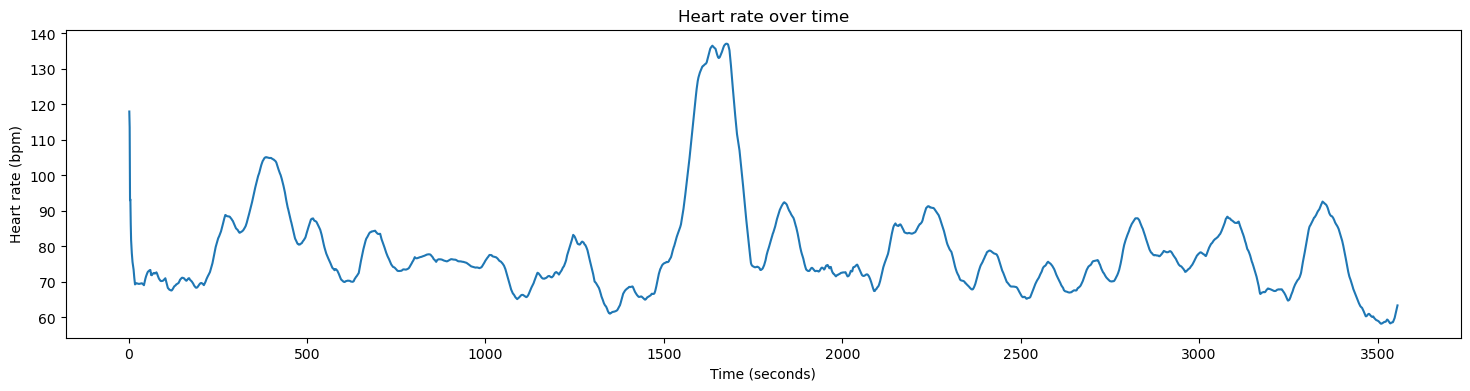

In [3]:
# Set the figure size to 8 inches by 4 inches
plt.figure(figsize=(18, 4))

# Create a line plot
plt.plot(hr)

# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Heart rate (bpm)")
plt.title("Heart rate over time")

# Show the plot
plt.show()


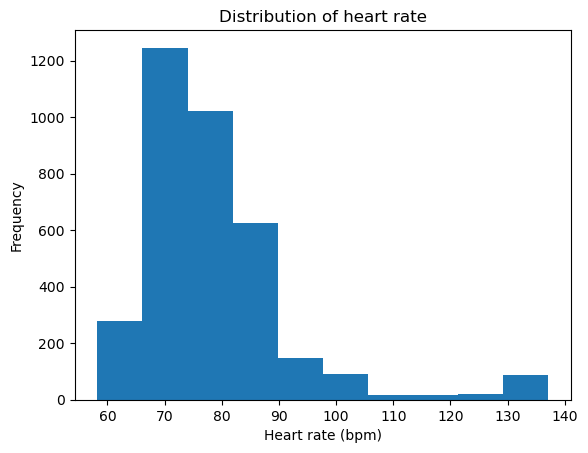

In [4]:
# Create a histogram with 10 bins
plt.hist(hr, bins=10)

# Add labels and title
plt.xlabel('Heart rate (bpm)')
plt.ylabel('Frequency')
plt.title('Distribution of heart rate')

# Show the plot
plt.show()


### Plotting temperature data

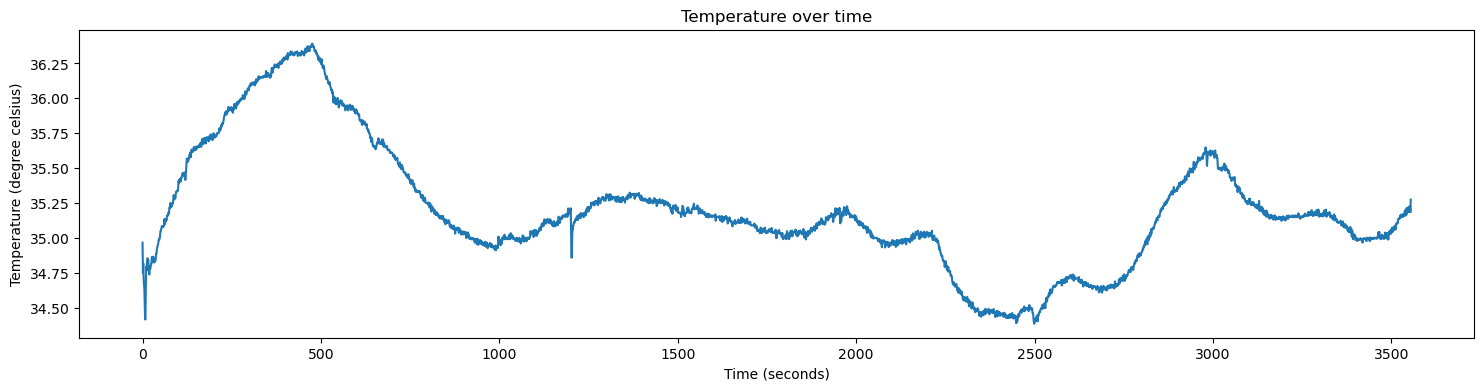

In [5]:
# resample temperature signal to match the dimension of the heart rate
r_temp = signal.resample(temp[: len(hr) * 4], len(hr))

# Set the figure size to 8 inches by 4 inches
plt.figure(figsize=(18, 4))

# Create a line plot
plt.plot(r_temp)

# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (degree celsius)")
plt.title("Temperature over time")

# Show the plot
plt.show()


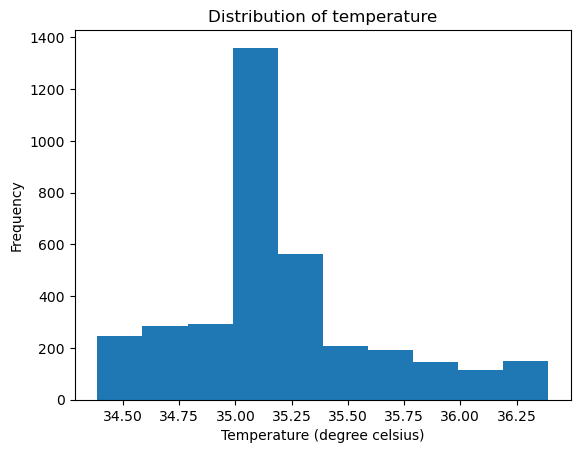

In [6]:
# Create a histogram with 10 bins
plt.hist(r_temp, bins=10)

# Add labels and title
plt.xlabel("Temperature (degree celsius)")
plt.ylabel("Frequency")
plt.title("Distribution of temperature")

# Show the plot
plt.show()


### Plotting skin conductance (EDA) data

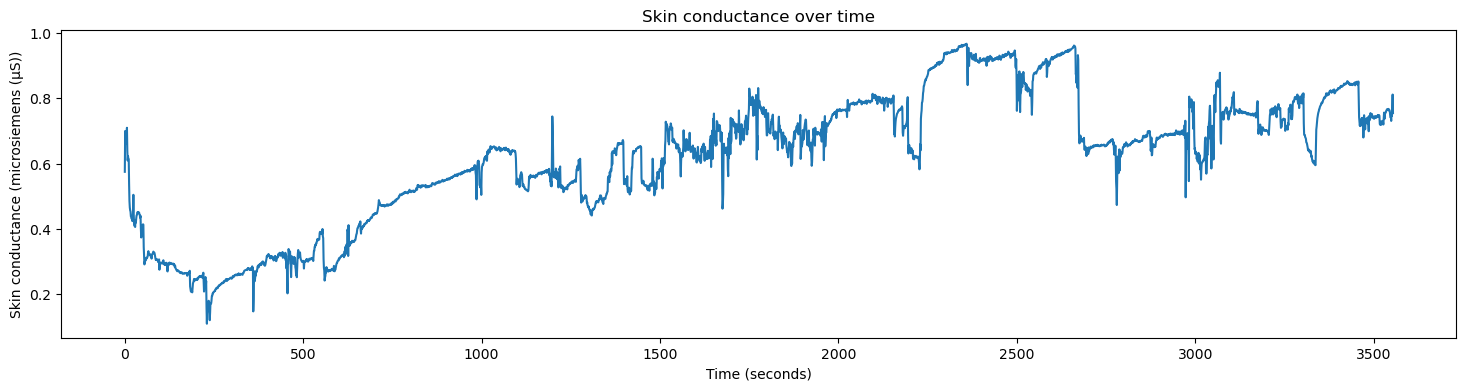

In [7]:
# resample temperature signal to match the dimension of the heart rate
r_eda = signal.resample(eda[: len(hr) * 4], len(hr))

# Set the figure size to 8 inches by 4 inches
plt.figure(figsize=(18, 4))

# Create a line plot
plt.plot(r_eda)

# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Skin conductance (microsiemens (μS))")
plt.title("Skin conductance over time")

# Show the plot
plt.show()


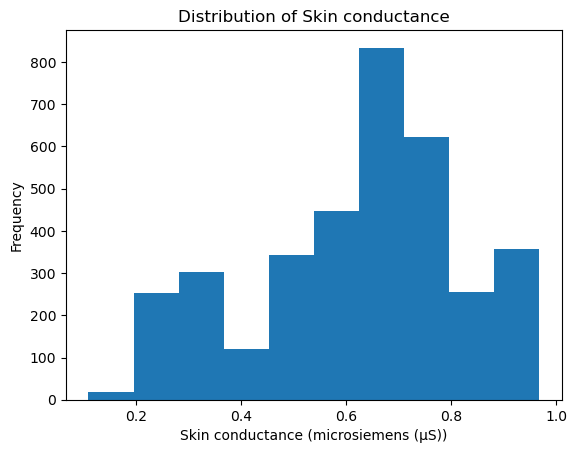

In [8]:
# Create a histogram with 10 bins
plt.hist(r_eda, bins=10)

# Add labels and title
plt.xlabel("Skin conductance (microsiemens (μS))")
plt.ylabel("Frequency")
plt.title("Distribution of Skin conductance")

# Show the plot
plt.show()


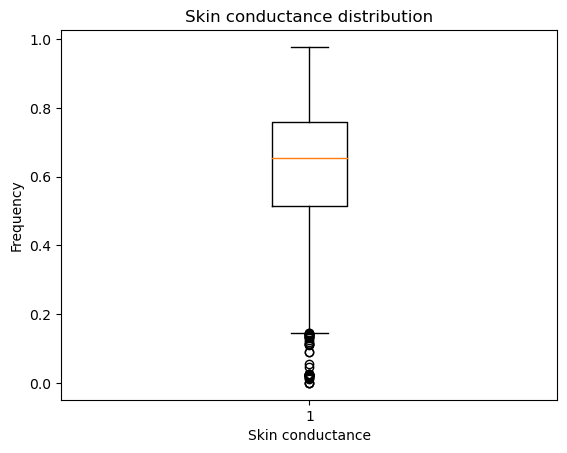

In [9]:
# Create box plot
plt.boxplot(eda)

# Add labels and title
plt.xlabel('Skin conductance')
plt.ylabel('Frequency')
plt.title('Skin conductance distribution')

# Show the plot
plt.show()

In [10]:
import pandas as pd

# Read the data from the file
utime = pd.read_csv(filepath_or_buffer="./Raw_data/S02/tags_S02.csv", header=None)

# Convert Unix timestamp to datetime format
for i in range(len(utime)):
    utime['datetime'] = pd.to_datetime(utime[0], unit='s')

# Print the updated dataframe
print(utime)

            0            datetime
0  1644228196 2022-02-07 10:03:16
1  1644228572 2022-02-07 10:09:32
2  1644228844 2022-02-07 10:14:04
3  1644229499 2022-02-07 10:24:59
4  1644229801 2022-02-07 10:30:01
5  1644229931 2022-02-07 10:32:11
6  1644230238 2022-02-07 10:37:18
7  1644230562 2022-02-07 10:42:42
8  1644231123 2022-02-07 10:52:03


### Merge data from differnet participant

In [11]:
import os
import pandas as pd
from scipy import signal

# Define the path to the main directory
main_dir = "./Raw_data/"

# Define the CSV file names to be merged
csv_files = ["HR.csv", "EDA.csv", "TEMP.csv"]

# Create an empty dataframe to store the merged data
merged_df = pd.DataFrame()

# Loop over the subfolders and merge the CSV files
for i in range(1, 36):
    # Create the subfolder name (e.g., s01)
    subfolder = "S{:02d}".format(i)
    # Define the path to the current subfolder
    subfolder_path = os.path.join(main_dir, subfolder)
    # Create a new dataframe to store the merged data for the current subfolder
    subfolder_df = pd.DataFrame()
    # Loop over the CSV files and read them into dataframes
    for csv_file in csv_files:
        # Define the path to the current CSV file
        csv_path = os.path.join(subfolder_path, csv_file)
        # Read the CSV file into a dataframe
        df = pd.read_csv(csv_path, header=None)

        df = pd.DataFrame(
            signal.resample(
                df[2 : len(pd.read_csv(os.path.join(subfolder_path, "HR.csv"))) * 4],
                len(pd.read_csv(os.path.join(subfolder_path, "HR.csv"))) - 2,
            )
        )
        df.columns = [csv_file]
        # Merge the dataframe with the current subfolder dataframe
        subfolder_df = pd.concat([subfolder_df, df], axis=1)
    # Add a new column to the merged dataframe to indicate the subfolder ID
    subfolder_df["Participant"] = i
    # Append the merged dataframe for the current subfolder to the overall merged dataframe
    merged_df = pd.concat([merged_df, subfolder_df], axis=0)

# Save the merged dataframe to a new CSV file
merged_df.to_csv("merged_data.csv", index=False)


## Marged Statistics data

In [12]:
merged_df.head() #show data first 5 

,HR.csv,EDA.csv,TEMP.csv,Participant
0,83.004791,0.096407,28.329786,1
1,82.991237,0.174099,28.404358,1
2,72.677859,0.158921,28.381104,1
3,87.002689,0.171371,28.397822,1
4,79.991447,0.161359,28.371568,1


In [13]:
merged_df.tail() ##show data last 5 

,HR.csv,EDA.csv,TEMP.csv,Participant
3507,65.365031,0.220761,32.220504,35
3508,65.425107,0.244023,32.263194,35
3509,65.444431,0.210796,32.185664,35
3510,65.476209,0.253655,32.294394,35
3511,65.492358,0.179025,32.084219,35


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115685 entries, 0 to 3511
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   HR.csv       115685 non-null  float64
 1   EDA.csv      115685 non-null  float64
 2   TEMP.csv     115685 non-null  float64
 3   Participant  115685 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 4.4 MB


## Check duplicate Values

In [15]:
#check the duplicate values
print("Number of duplicate entries: " + str(merged_df.duplicated().sum()))

Number of duplicate entries: 0


## Check Null Values

In [16]:
#check the null values
print("Number of null entries: " + str(merged_df.isnull().values.any().sum() + 1))

Number of null entries: 1


In [17]:
# Dropping Null Entries
df = df.dropna()

In [18]:
# Recheck null values
print("Number of null entries: ", merged_df.isnull().values.any().sum())

Number of null entries:  0


## Preprocessing

In [19]:
from sklearn.preprocessing import StandardScaler

# Remove any rows with missing values
merged_df.dropna(inplace=True)

# Standardize the data using the StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(merged_df.iloc[:, :-1]), columns=merged_df.columns[:-1])

# Label the data with a binary classification of 'stressed' or 'not stressed'
scaled_df["Label"] = scaled_df.apply(lambda x: 1 if x["HR.csv"] > 0.5 or x["EDA.csv"] > 0.5 or x["TEMP.csv"] > 0.5 else 0, axis=1)


In [20]:
scaled_df

,HR.csv,EDA.csv,TEMP.csv,Label
0,0.237763,-0.642127,-1.226362,0
1,0.236696,-0.582913,-1.194582,0
2,-0.574723,-0.594481,-1.204493,0
3,0.552303,-0.584992,-1.197368,1
4,0.000684,-0.592623,-1.208556,0
...,...,...,...,...
115680,-1.150069,-0.547349,0.431696,0
115681,-1.145343,-0.529620,0.449889,0
115682,-1.143822,-0.554944,0.416849,0
115683,-1.141322,-0.522278,0.463185,0


Text(0, 0.5, 'Temparature')

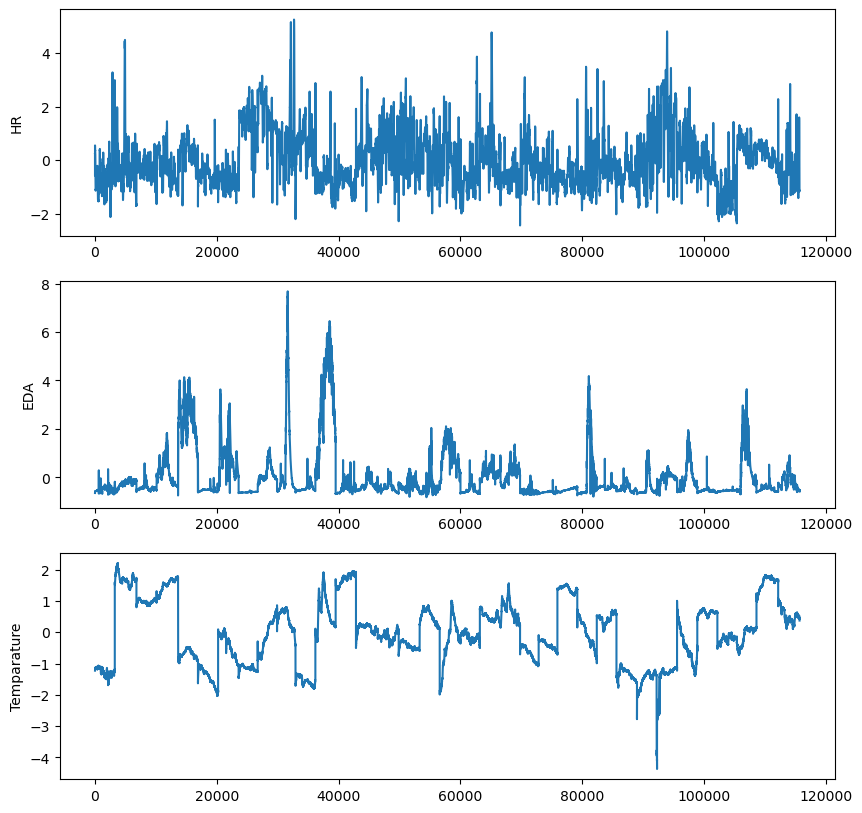

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot the first column
axs[0].plot(scaled_df.index, scaled_df.iloc[:, 0])
axs[0].set_ylabel('HR')

# Plot the second column
axs[1].plot(scaled_df.index, scaled_df.iloc[:, 1])
axs[1].set_ylabel('EDA')

# Plot the third column
axs[2].plot(scaled_df.index, scaled_df.iloc[:, 2])
axs[2].set_ylabel('Temparature')


## Model baseline LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = scaled_df.drop('Label', axis=1)
y = scaled_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the test data and calculate accuracy
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print("Accuracy:", accuracy)


print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy: 0.8630332368068462
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      8679
           1       0.88      0.91      0.89     14458

    accuracy                           0.86     23137
   macro avg       0.86      0.85      0.85     23137
weighted avg       0.86      0.86      0.86     23137

Confusion Matrix:
 [[ 6827  1852]
 [ 1317 13141]]
Accuracy Score: 0.8630332368068462


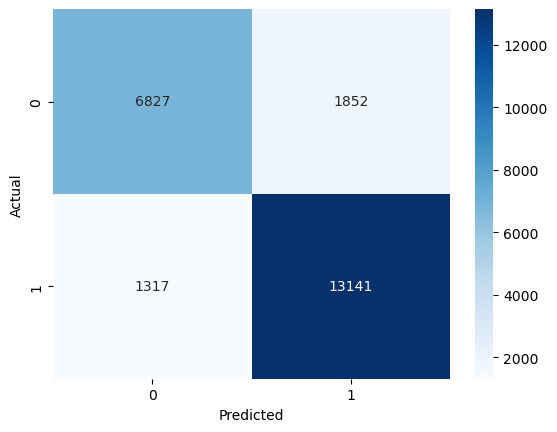

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# make predictions using the model and test set
y_pred = lr.predict(X_test)

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Hyperparameters  tune using GridSearchCV

Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Training score: 0.8642283420828747
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      4446
           1       0.87      0.91      0.89      7123

    accuracy                           0.86     11569
   macro avg       0.86      0.85      0.85     11569
weighted avg       0.86      0.86      0.86     11569



<AxesSubplot:>

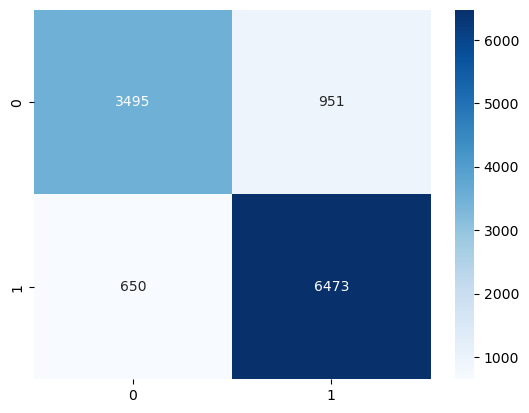

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Split the data into training and testing sets
X = scaled_df.drop('Label', axis=1)
y = scaled_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

# Define hyperparameters to tune
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform grid search with cross-validation
lr = LogisticRegression()
grid_search = GridSearchCV(lr, params, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Training score:", grid_search.best_score_)

# Predict on the test data and calculate metrics
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')


## Model baseline Naive Bayes 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 22)

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_predict = gnb.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      8888
           1       0.93      0.85      0.89     14249

    accuracy                           0.87     23137
   macro avg       0.86      0.87      0.86     23137
weighted avg       0.87      0.87      0.87     23137



In [26]:
print("MAE Score: ", mae(y_test, y_predict))
print("Accuracy: ", accuracy_score(y_test, y_predict))

MAE Score:  0.13402774776332282
Accuracy:  0.8659722522366772


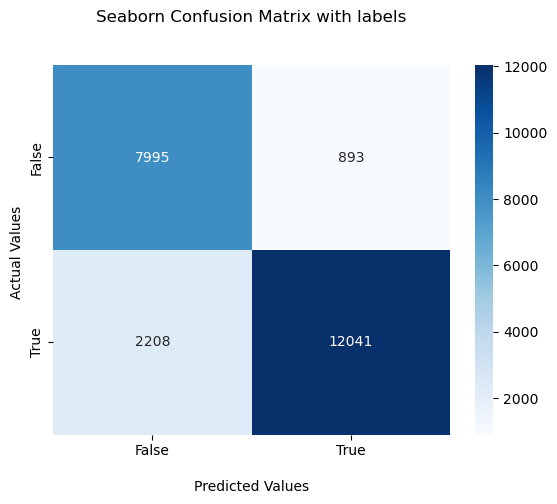

In [27]:
cf_matrix = confusion_matrix(y_test, y_predict)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()